<a href="https://colab.research.google.com/github/B10956048/113_Finance/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>作業要求</b>
### 1. 延用上週爬取的股價資料
### 2. 計算技術指標（SMA、RSI、MACD）
### 3. 可視化 K 線圖
### 4. 使用技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌。技術指標作為特徵來預測第 n 天的股價

# <b>取得股價資料</b>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
RANDOM_SEED = 42

In [ ]:
# 輸入股票代號 改為2454聯發科
stock_id = "2454.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-08,1175.0,1180.0,1145.0,1150.0,1125.113159,4066781
1,2024-04-09,1160.0,1175.0,1150.0,1160.0,1134.896729,3322521
2,2024-04-10,1170.0,1215.0,1165.0,1195.0,1169.139282,6393274
3,2024-04-11,1205.0,1230.0,1185.0,1200.0,1174.031006,6271331
4,2024-04-12,1190.0,1200.0,1165.0,1180.0,1154.463867,5214036
...,...,...,...,...,...,...,...
117,2024-09-25,1220.0,1230.0,1205.0,1225.0,1225.000000,10887978
118,2024-09-26,1235.0,1280.0,1230.0,1270.0,1270.000000,9413246
119,2024-09-27,1280.0,1305.0,1250.0,1260.0,1260.000000,8955853
120,2024-09-30,1235.0,1235.0,1175.0,1175.0,1175.000000,8477410


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [ ]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA
117,2024-09-25,1220.0,1230.0,1205.0,1225.0,1225.0,10887978,1146.250,1139.615385,1159.75
118,2024-09-26,1235.0,1280.0,1230.0,1270.0,1270.0,9413246,1164.375,1149.230769,1163.25
119,2024-09-27,1280.0,1305.0,1250.0,1260.0,1260.0,8955853,1180.625,1161.153846,1163.75
120,2024-09-30,1235.0,1235.0,1175.0,1175.0,1175.0,8477410,1189.375,1164.615385,1160.50
121,2024-10-01,1195.0,1230.0,1190.0,1210.0,1210.0,6000269,1200.625,1172.307692,1159.75


## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [ ]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
117,2024-09-25,1220.0,1230.0,1205.0,1225.0,1225.0,10887978,1146.250,1139.615385,1159.75,30.0,30.0,0.0,16.428571,10.000000,1.642857,62.162162
118,2024-09-26,1235.0,1280.0,1230.0,1270.0,1270.0,9413246,1164.375,1149.230769,1163.25,45.0,45.0,0.0,19.642857,8.214286,2.391304,70.512821
119,2024-09-27,1280.0,1305.0,1250.0,1260.0,1260.0,8955853,1180.625,1161.153846,1163.75,-10.0,0.0,10.0,17.142857,8.928571,1.920000,65.753425
120,2024-09-30,1235.0,1235.0,1175.0,1175.0,1175.0,8477410,1189.375,1164.615385,1160.50,-85.0,0.0,85.0,17.142857,12.142857,1.411765,58.536585
121,2024-10-01,1195.0,1230.0,1190.0,1210.0,1210.0,6000269,1200.625,1172.307692,1159.75,35.0,35.0,0.0,17.857143,12.142857,1.470588,59.523810


## 1.3 計算平滑異同移動平均線（MACD）

In [ ]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-04-08,1175.0,1180.0,1145.0,1150.0,1125.113159,4066781,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1150.000000,1150.000000,0.000000
1,2024-04-09,1160.0,1175.0,1150.0,1160.0,1134.896729,3322521,NaN,NaN,NaN,10.0,10.0,0.0,NaN,NaN,NaN,NaN,1152.222222,1151.428571,0.793651
2,2024-04-10,1170.0,1215.0,1165.0,1195.0,1169.139282,6393274,NaN,NaN,NaN,35.0,35.0,0.0,NaN,NaN,NaN,NaN,1161.728395,1157.653061,4.075334


# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

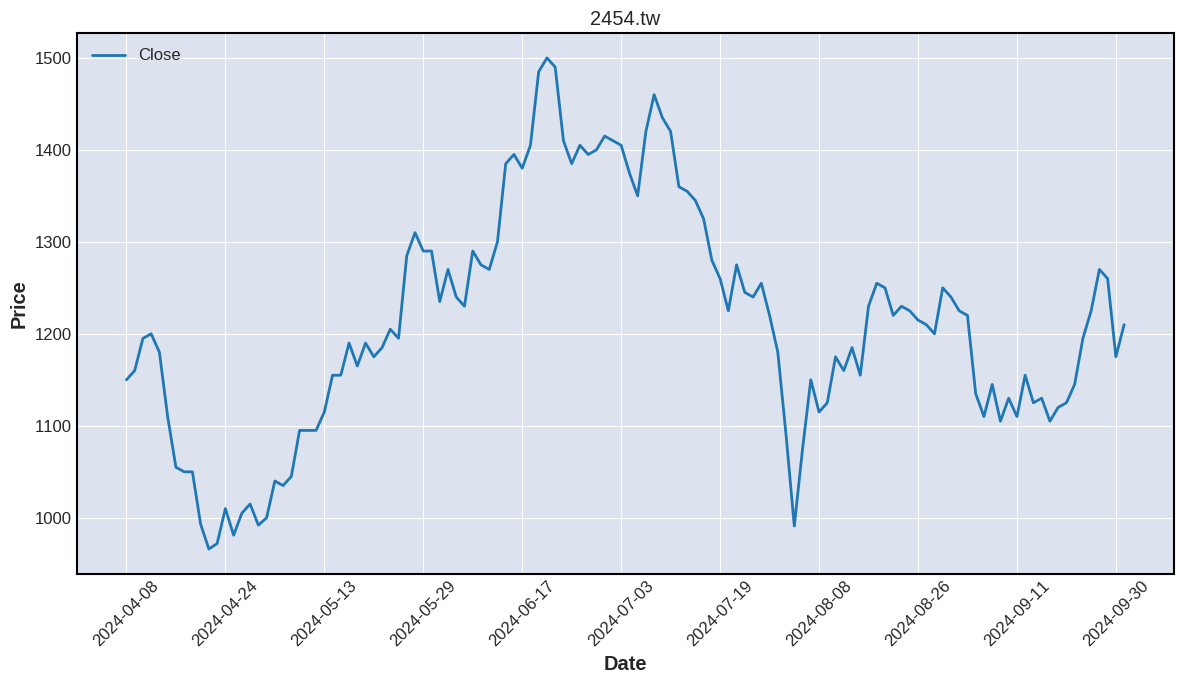

In [ ]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

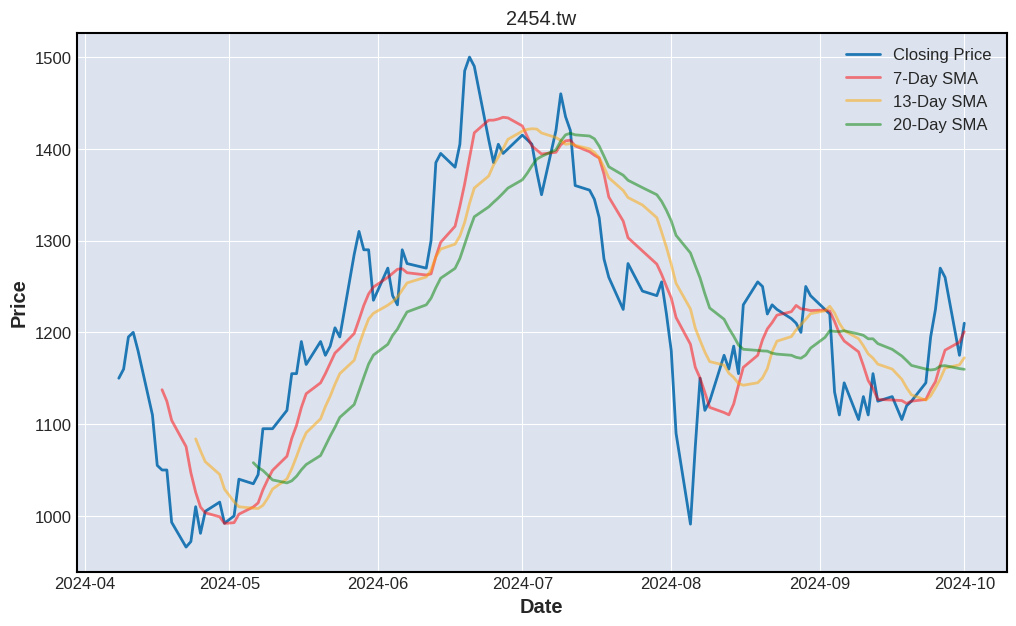

In [ ]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='7-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [ ]:
!pip install mplfinance

In [ ]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2024-8-01':'2024-09-18'].tail()

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,,
2024-09-11,1125.0,1135.0,1110.0,1110.0,1110.0,4019795,1147.500,1176.538462,1193.00,-20.0,0.0,20.0,7.857143,16.428571,0.478261,32.352941,1143.118418,1159.767887,-16.649468
2024-09-12,1150.0,1155.0,1135.0,1155.0,1155.0,4341122,1138.750,1171.923077,1193.00,45.0,45.0,0.0,11.071429,16.071429,0.688889,40.789474,1145.758770,1159.086760,-13.327990
2024-09-13,1160.0,1165.0,1125.0,1125.0,1125.0,3453407,1126.875,1165.384615,1187.75,-30.0,0.0,30.0,11.071429,17.500000,0.632653,38.750000,1141.145710,1154.217223,-13.071513
2024-09-16,1120.0,1130.0,1100.0,1130.0,1130.0,3682733,1126.250,1160.000000,1181.50,5.0,5.0,0.0,11.428571,17.142857,0.666667,40.000000,1138.668885,1150.757620,-12.088734
2024-09-18,1115.0,1120.0,1095.0,1105.0,1105.0,7064375,1125.625,1148.846154,1174.25,-25.0,0.0,25.0,11.428571,18.214286,0.627451,38.554217,1131.186911,1144.220817,-13.033906


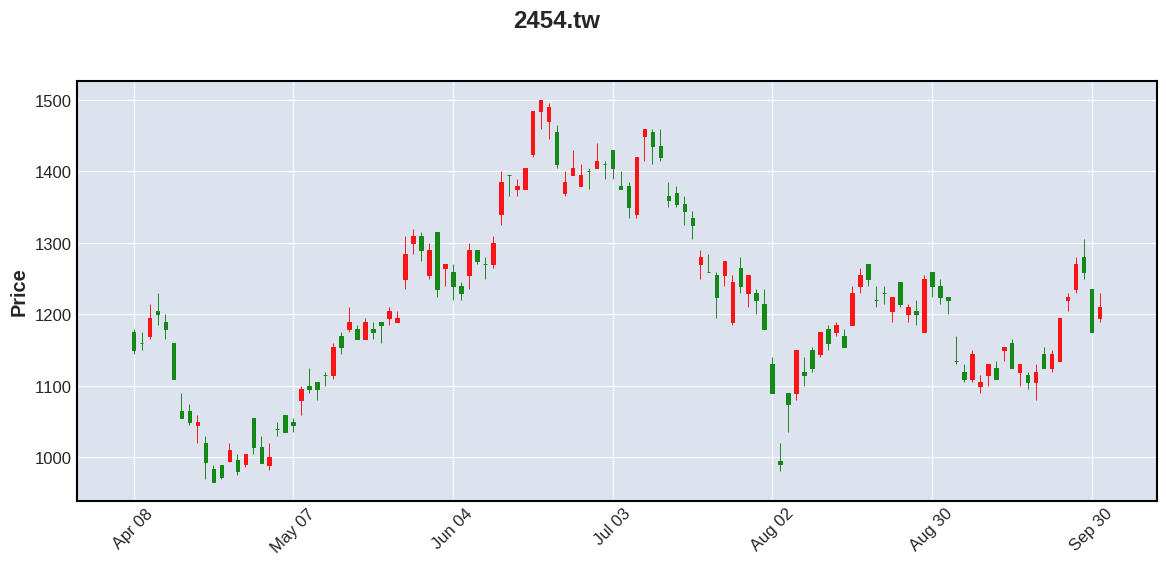

In [ ]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [ ]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-22,1190.0,1190.0,1160.0,1185.0,1159.355713,4429872,1166.250,1130.384615,1086.90,10.0,...,16.428571,3.214286,5.111111,83.636364,1159.754643,1137.929457,21.825186,5.0,25.0,0.0
2024-06-03,1265.0,1270.0,1240.0,1270.0,1242.516235,6293578,1260.000,1229.615385,1187.00,35.0,...,17.142857,8.928571,1.920000,65.753425,1251.991309,1227.803489,24.187820,5.0,25.0,0.0
2024-07-09,1450.0,1460.0,1415.0,1460.0,1460.000000,9654123,1404.375,1409.230769,1408.50,40.0,...,11.785714,13.571429,0.868421,46.478873,1410.255556,1402.425243,7.830313,10.0,35.0,0.0
2024-08-06,1090.0,1090.0,1035.0,1075.0,1075.000000,16439278,1162.000,1204.692308,1272.80,84.0,...,10.642857,30.642857,0.347319,25.778547,1141.343054,1188.938795,-47.595741,15.0,40.0,0.0
2024-09-03,1225.0,1225.0,1200.0,1220.0,1220.000000,3422128,1223.125,1228.461538,1201.75,-5.0,...,11.428571,8.928571,1.280000,56.140351,1223.349500,1218.537425,4.812075,5.0,20.0,0.0
2024-09-12,1150.0,1155.0,1135.0,1155.0,1155.000000,4341122,1138.750,1171.923077,1193.00,45.0,...,11.071429,16.071429,0.688889,40.789474,1145.758770,1159.086760,-13.327990,5.0,15.0,0.0


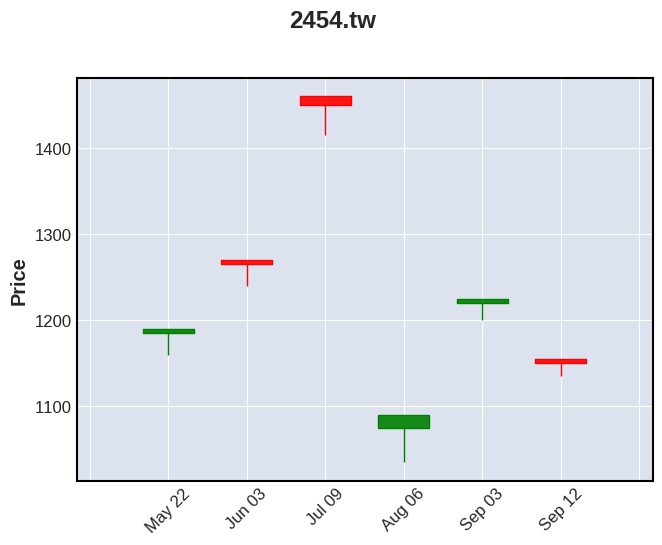

In [ ]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [ ]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,Change,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-09,1160.0,1175.0,1150.0,1160.0,1134.896729,3322521,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,1152.222222,1151.428571,0.793651,0.0,10.0,15.0
2024-05-03,1040.0,1050.0,1030.0,1040.0,1017.493591,6598170,1001.875,1009.923077,NaN,40.0,...,9.000000,19.000000,0.473684,32.142857,1015.075590,1028.273059,-13.197469,0.0,10.0,10.0
2024-05-13,1115.0,1120.0,1100.0,1115.0,1090.870483,4025166,1065.000,1040.230769,1035.95,20.0,...,14.714286,4.071429,3.614035,78.326996,1073.889836,1063.574045,10.315790,0.0,15.0,5.0
2024-06-11,1270.0,1280.0,1250.0,1270.0,1242.516235,5557895,1262.500,1260.384615,1230.00,-5.0,...,17.142857,10.357143,1.655172,62.337662,1261.805076,1247.276726,14.528350,0.0,20.0,10.0
2024-06-14,1395.0,1395.0,1365.0,1395.0,1364.811157,5947681,1298.125,1290.769231,1259.00,10.0,...,23.928571,9.642857,2.481481,71.276596,1317.831469,1290.777763,27.053706,0.0,30.0,0.0
2024-06-28,1400.0,1405.0,1375.0,1400.0,1369.702881,6843642,1433.750,1410.384615,1357.25,5.0,...,19.285714,10.357143,1.862069,65.060241,1405.946351,1391.190242,14.756109,0.0,25.0,5.0
2024-07-02,1410.0,1415.0,1390.0,1410.0,1379.486450,5090265,1413.750,1421.153846,1373.25,-5.0,...,18.214286,10.357143,1.758621,63.750000,1408.411990,1396.792831,11.619159,0.0,20.0,5.0
2024-07-19,1260.0,1285.0,1260.0,1260.0,1260.000000,5871057,1347.500,1368.461538,1380.50,-20.0,...,7.857143,18.928571,0.415094,29.333333,1329.822182,1349.911936,-20.089754,0.0,0.0,25.0
2024-08-21,1220.0,1240.0,1210.0,1220.0,1220.000000,4500318,1203.750,1160.461538,1179.55,-30.0,...,24.571429,21.714286,1.131579,53.086420,1207.288610,1199.796898,7.491712,0.0,10.0,20.0


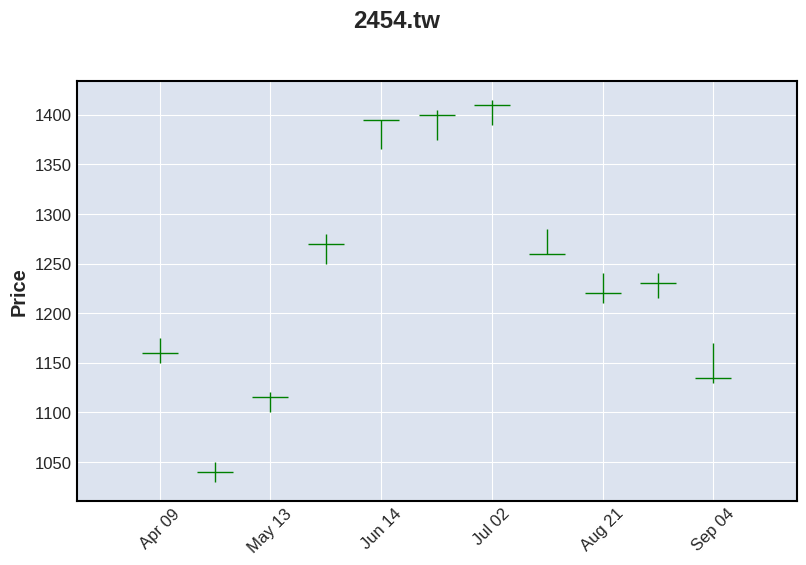

In [ ]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [ ]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
0,2024-04-08,1175.0,1180.0,1145.0,1150.0,1125.113159,4066781,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1150.000000,1150.000000,0.000000,25.0,5.0,5.0
1,2024-04-09,1160.0,1175.0,1150.0,1160.0,1134.896729,3322521,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1152.222222,1151.428571,0.793651,0.0,10.0,15.0
2,2024-04-10,1170.0,1215.0,1165.0,1195.0,1169.139282,6393274,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1161.728395,1157.653061,4.075334,25.0,5.0,20.0
3,2024-04-11,1205.0,1230.0,1185.0,1200.0,1174.031006,6271331,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1170.233196,1163.702624,6.530572,5.0,15.0,25.0
4,2024-04-12,1190.0,1200.0,1165.0,1180.0,1154.463867,5214036,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1172.403597,1166.030820,6.372777,10.0,15.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2024-09-25,1220.0,1230.0,1205.0,1225.0,1225.000000,10887978,1146.250,1139.615385,1159.75,...,16.428571,10.000000,1.642857,62.162162,1163.363959,1158.463502,4.900457,5.0,15.0,5.0
118,2024-09-26,1235.0,1280.0,1230.0,1270.0,1270.000000,9413246,1164.375,1149.230769,1163.25,...,19.642857,8.214286,2.391304,70.512821,1187.060857,1174.397287,12.663570,35.0,5.0,10.0
119,2024-09-27,1280.0,1305.0,1250.0,1260.0,1260.000000,8955853,1180.625,1161.153846,1163.75,...,17.142857,8.928571,1.920000,65.753425,1203.269555,1186.626246,16.643309,20.0,10.0,25.0
120,2024-09-30,1235.0,1235.0,1175.0,1175.0,1175.000000,8477410,1189.375,1164.615385,1160.50,...,17.142857,12.142857,1.411765,58.536585,1196.987432,1184.965354,12.022078,60.0,0.0,0.0


In [ ]:
# 標籤生成: 預測未來1天的價格，這裡以2024-04-01的技術指標 預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((102, 3), (102,))

In [ ]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((81, 3), (21, 3), (81,), (21,))

## 3.2 線性回歸（Linear Regression）

In [ ]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 43.72
線性回歸模型預測未來1天的價格: 1221.30


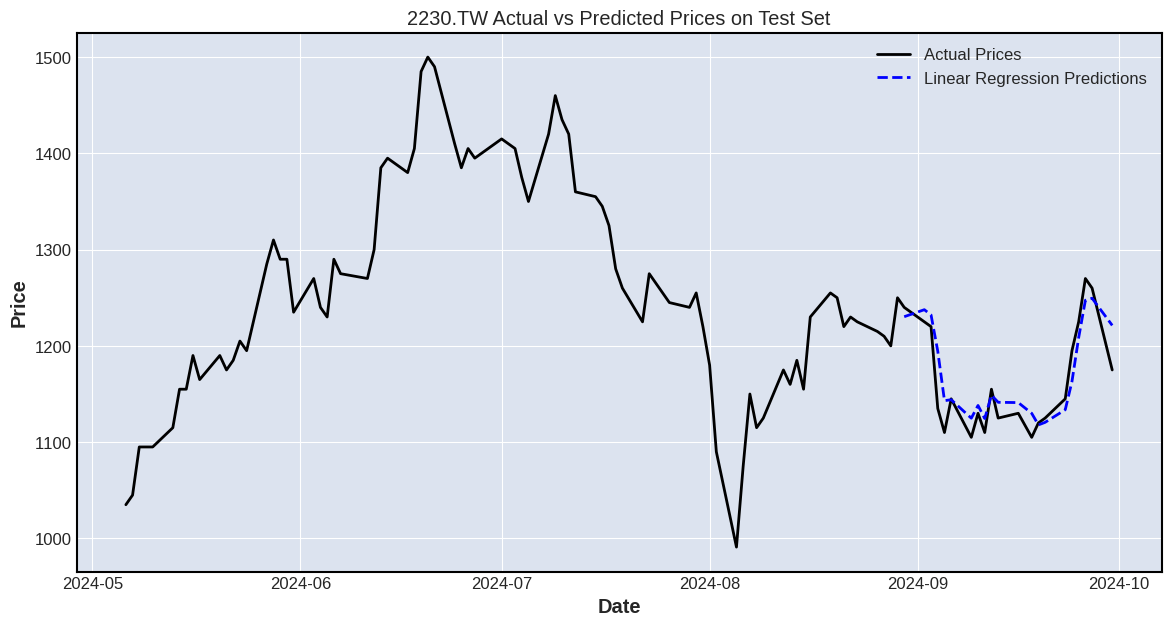

In [ ]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor(random_state=RANDOM_SEED)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 88.43
決策樹模型預測未來1天的價格: 1200.00


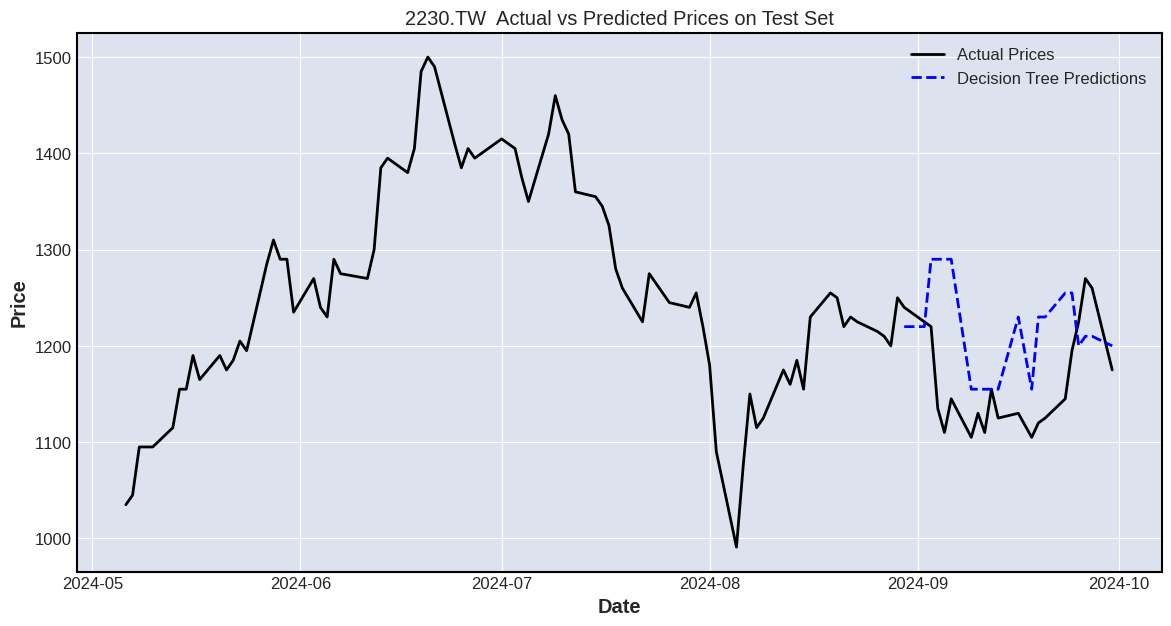

In [ ]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [ ]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor(random_state=RANDOM_SEED)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 52.22
隨機森林模型預測未來1天的價格: 1249.10


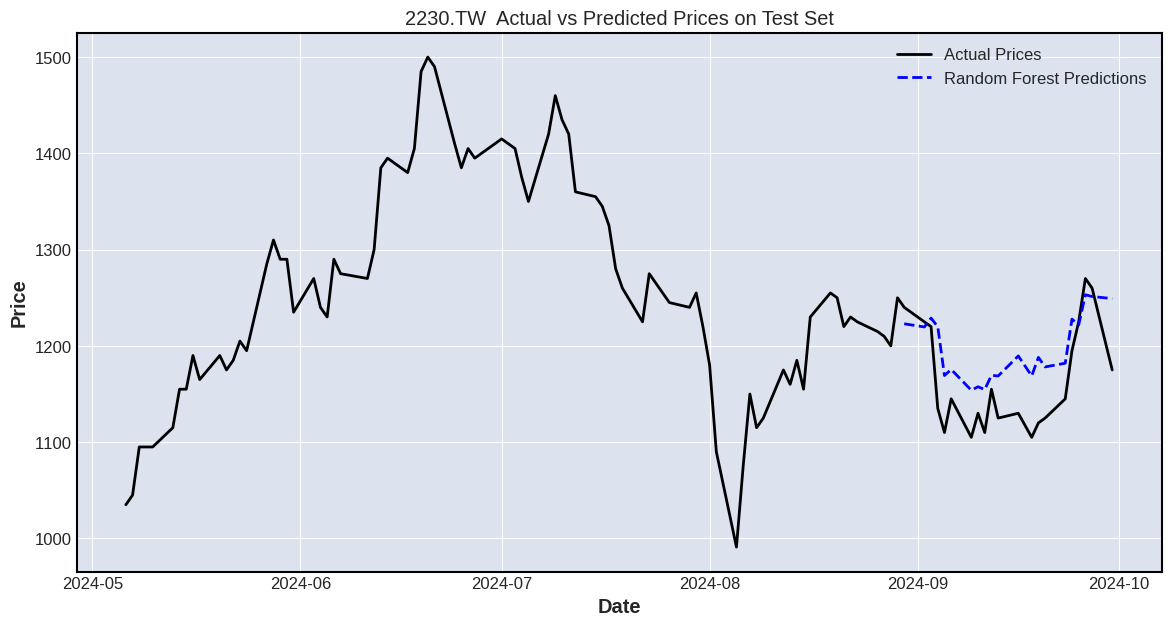

In [ ]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 技術指標交互分析與最佳化選擇

In [ ]:
import itertools

# 抓取半年資料
stock_id = "2454.tw"
end = dt.date.today()
start = end - dt.timedelta(days=180)
df = yf.download(stock_id, start=start, end=end).reset_index()

# 計算各種技術指標
# 1. 短期與長期 SMA
df['5_SMA'] = df['Close'].rolling(window=5).mean()
df['10_SMA'] = df['Close'].rolling(window=10).mean()
df['50_SMA'] = df['Close'].rolling(window=50).mean()
df['100_SMA'] = df['Close'].rolling(window=100).mean()

# 2. EMA
df['12_EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26_EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12_EMA'] - df['26_EMA']  # MACD 指標

# 3. RSI
df['Change'] = df['Close'] - df['Close'].shift(1)
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()
df['RS'] = df['Avg Gain'] / df['Avg Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 4. Bollinger Bands
df['Rolling Mean'] = df['Close'].rolling(window=20).mean()
df['Rolling Std'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['Rolling Mean'] + (df['Rolling Std'] * 2)
df['Lower Band'] = df['Rolling Mean'] - (df['Rolling Std'] * 2)

# 5. KD 指標（隨機指標）
df['Low_Min'] = df['Low'].rolling(window=14).min()
df['High_Max'] = df['High'].rolling(window=14).max()
df['%K'] = (df['Close'] - df['Low_Min']) / (df['High_Max'] - df['Low_Min']) * 100
df['%D'] = df['%K'].rolling(window=3).mean()

# 6. 成交量變動率
df['Volume_Change'] = df['Volume'].pct_change()

all_features = [
    '5_SMA', '10_SMA', '50_SMA', '100_SMA', '12_EMA', '26_EMA', 'MACD',
    'RSI', 'Rolling Mean', 'Upper Band', 'Lower Band', '%K', '%D', 'Volume_Change'
]
# 預測未來 1 天的價格
df['Future_Price'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# 組合所有三個一組的特徵組合
combinations = list(itertools.combinations(all_features, 3))

results = {}
for combination in combinations:
  X = df[list(combination)]  # 選擇特徵組合
  y = df['Future_Price']
  # 拆分訓練集和測試集
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

  # 使用隨機森林模型進行訓練
  model = RandomForestRegressor(random_state=42)
  model.fit(X_train, y_train)

  # 預測
  y_pred = model.predict(X_test)

  # 計算 RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  results[combination] = rmse
# 將結果轉換為 DataFrame 並排序
results_df = pd.DataFrame(list(results.items()), columns=['Feature Combination', 'RMSE'])
top_5_combinations = results_df.sort_values(by='RMSE').head(5)

# 顯示最佳的前 5 個組合
print("最佳的前 5 個特徵組合：")
print(top_5_combinations)

[*********************100%***********************]  1 of 1 completed


最佳的前 5 個特徵組合：
             Feature Combination       RMSE
351       (Rolling Mean, %K, %D)  35.638231
331      (RSI, Rolling Mean, %K)  37.151857
232  (100_SMA, Rolling Mean, %D)  38.067683
241            (100_SMA, %K, %D)  38.099711
316     (MACD, Rolling Mean, %K)  38.256731
